## 1. Data Import from kaggle
We are going to use a dataset available from kaggle:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Understanding the raw data

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data preprocessing 
ensures that the dataset is clean, balanced, and appropriately formatted for model training. By addressing missing values, outliers, and class imbalance, and by standardizing features, the data preprocessing step sets the foundation for accurate and reliable credit card fraud detection models.


Some things that I can consider:

1)Handling Missing Values: Examine the dataset to identify and handle missing values in any of the features. You can use techniques like imputation or removal based on the extent of missing data.

2)Outlier Detection and Treatment: Identify outliers in features like "Amount" and "V1" through "V28." Decide whether to remove or transform these outliers based on their impact.

3)Data Splitting: Split the dataset into training and validation sets to prepare for model training and evaluation.

4)Feature Scaling and Normalization: Apply appropriate scaling techniques to the numerical features "Amount" and "V1" through "V28."

+ Class Imbalance Handling: Analyze the distribution of the "Class" labels. If there's a class imbalance, consider implementing techniques like oversampling or undersampling to address it.



## 3.1 - missing values

In [5]:
# Checking percent of missing values in columns
df_missing_columns = (round(((data.isnull().sum() / len(data.index)) * 100), 2).to_frame('null')).sort_values('null', ascending=False)
# Display the DataFrame showing missing value percentages
print(df_missing_columns)


        null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0


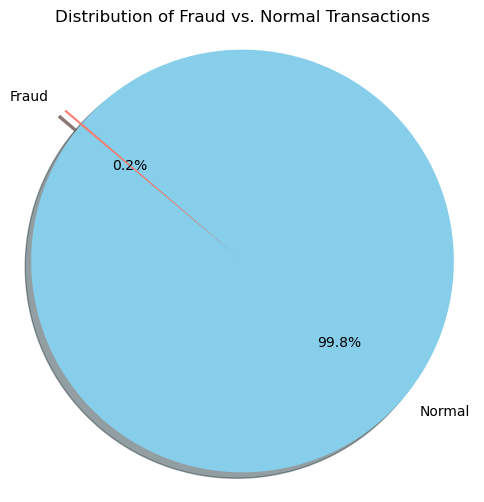

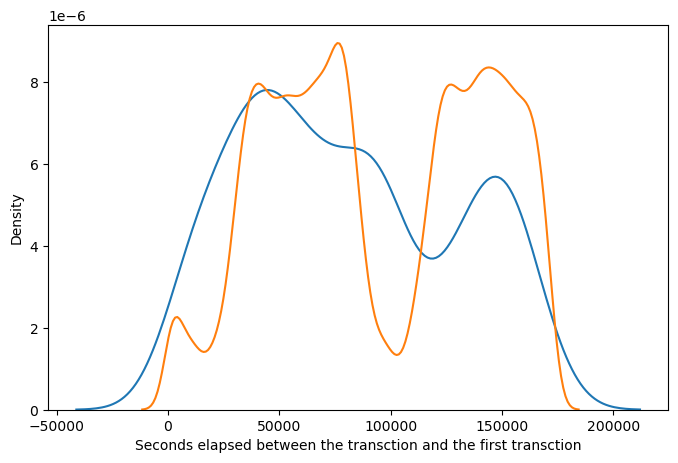

In [6]:
# Calculate the percentage of each class
classes = data['Class'].value_counts()
normal_share = round((classes[0] / data['Class'].count() * 100), 2)
fraud_share = round((classes[1] / data['Class'].count() * 100), 2)

# Create a pie chart
labels = ['Normal', 'Fraud']
sizes = [normal_share, fraud_share]
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fraud vs. Normal Transactions')
plt.show()

# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


## 3.2 - outlier treatment.

We are refraining from applying any outlier treatment to this specific dataset. This decision is based on the fact that all columns have already undergone PCA transformation, which implies that outlier values were accounted for during the data transformation process.

It is evident that the data is significantly imbalanced, with the majority of transactions categorized as "No Fraud."

Due to this substantial class imbalance, a classification model could exhibit a bias in its predictions, favoring the majority class ("No Fraud").

Consequently, achieving a balanced distribution in the data becomes a pivotal aspect of constructing a resilient model.

## 3.3 - Data Splitting

Training Data (X_train, y_train): This subset of the data is used to train your machine learning model. It includes both feature variables (X_train) and their corresponding target labels (y_train). The model learns patterns and relationships in the training data to make predictions.

Validation Data (X_val, y_val): This subset of the data is used to assess the performance of your trained model. After the model has been trained on the training data, it's evaluated on the validation data to understand how well it generalizes to new, unseen examples. This helps you tune hyperparameters, compare different models, and detect overfitting or underfitting.

The train_test_split function from scikit-learn (sklearn) is used to perform this split. It takes your feature variables (X) and target labels (y) and divides them into the training and validation sets. The test_size parameter specifies the proportion of data to be allocated for validation. For example, if test_size=0.2, 20% of the data will be used for validation, and the remaining 80% will be used for training.

Additionally, the random_state parameter is used to ensure reproducibility. Setting it to a specific value (e.g., random_state=42) ensures that the same random splitting is performed every time you run your code, making your results consistent.

## 3.4 Featured Scaling

Feature scaling is a common preprocessing step in machine learning to standardize the range of independent variables (features) so that they have similar scales. This can improve the performance and convergence of many machine learning algorithms.

Creating the Scaler: scaler = StandardScaler() creates an instance of the StandardScaler class, which will be used to scale your data.

Fitting and Transforming: scaler.fit_transform(X_resampled) applies the scaling transformation to the input data X_resampled. This involves two steps:

Fit: The scaler calculates the mean and standard deviation of each feature in the dataset.
Transform: The scaler then transforms the features by subtracting the mean and dividing by the standard deviation, essentially standardizing the features to have a mean of 0 and a standard deviation of 1.
After this code is executed, X_rescaled will contain your resampled dataset with the features scaled using the standardization method. This is particularly important when working with algorithms that are sensitive to the scale of features, as explained earlier.

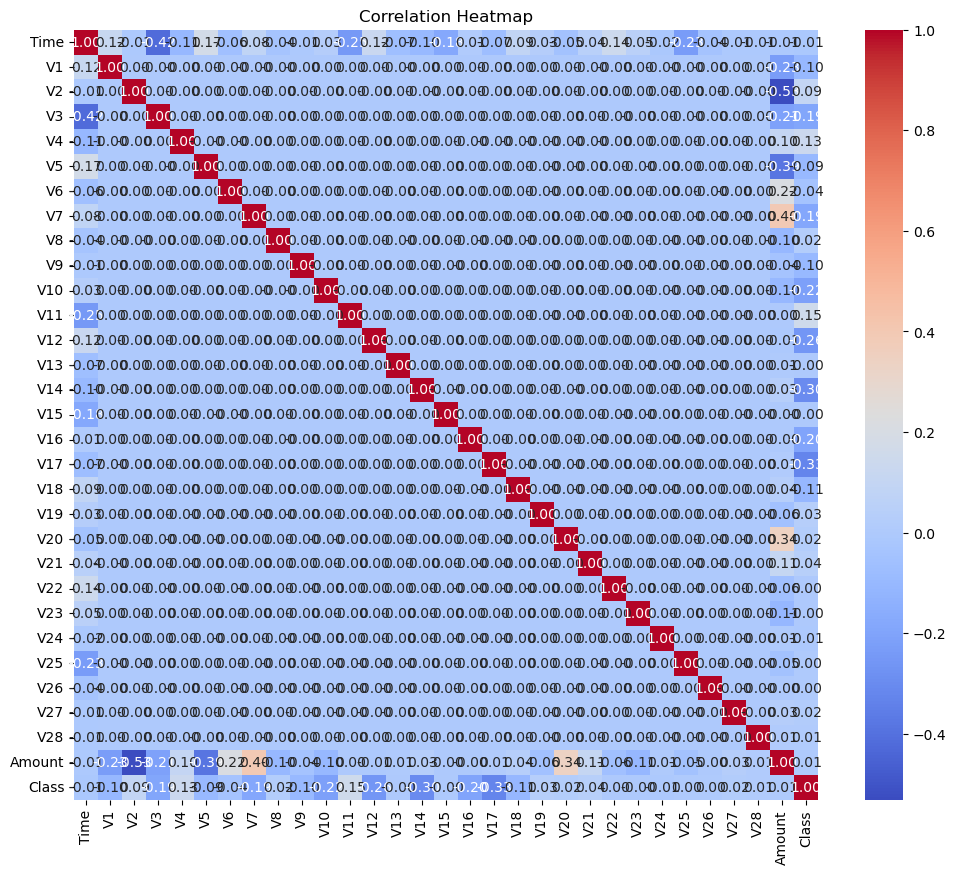

Feature: Amount, F-value: 9.03, p-value: 0.0027
Feature: Time, F-value: 43.25, p-value: 0.0000
Feature: V1, F-value: 2955.67, p-value: 0.0000
Feature: V10, F-value: 14057.98, p-value: 0.0000
Feature: V11, F-value: 6999.36, p-value: 0.0000
Feature: V12, F-value: 20749.82, p-value: 0.0000
Feature: V13, F-value: 5.95, p-value: 0.0147
Feature: V14, F-value: 28695.55, p-value: 0.0000
Feature: V15, F-value: 5.08, p-value: 0.0242
Feature: V16, F-value: 11443.35, p-value: 0.0000
Feature: V17, F-value: 33979.17, p-value: 0.0000
Feature: V18, F-value: 3584.38, p-value: 0.0000
Feature: V19, F-value: 344.99, p-value: 0.0000
Feature: V2, F-value: 2393.40, p-value: 0.0000
Feature: V20, F-value: 115.00, p-value: 0.0000
Feature: V21, F-value: 465.92, p-value: 0.0000
Feature: V22, F-value: 0.18, p-value: 0.6674
Feature: V23, F-value: 2.05, p-value: 0.1519
Feature: V24, F-value: 14.85, p-value: 0.0001
Feature: V25, F-value: 3.12, p-value: 0.0775
Feature: V26, F-value: 5.65, p-value: 0.0174
Feature: V27,

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from scipy.stats import f_oneway
from collections import Counter


# Split the data into features (X) and target (y)
X = data.drop(['Class'], axis=1)
y = data['Class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the 'Amount' column of the training data
X_train_scaled = X_train.copy()
X_train_scaled['Amount'] = scaler.fit_transform(X_train_scaled[['Amount']])

# Transform the 'Amount' column of the validation data using the same scaler
X_val_scaled = X_val.copy()
X_val_scaled['Amount'] = scaler.transform(X_val_scaled[['Amount']])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Separate the features by class labels
feature_columns = data.columns.difference(['Class'])  # Exclude the target variable
feature_data = [data[column] for column in feature_columns]
class_labels = data['Class'].unique()

# Perform ANOVA for each feature
anova_results = {}
for column, feature in zip(feature_columns, feature_data):
    anova_results[column] = f_oneway(*[feature[data['Class'] == label] for label in class_labels])

# Display ANOVA results
for column, result in anova_results.items():
    print(f"Feature: {column}, F-value: {result.statistic:.2f}, p-value: {result.pvalue:.4f}")

# Data Balancing for Model based on Correlation Plot
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('under', under), ('over', over)]
pipeline = Pipeline(steps=steps)
X_train_scaled_resampled_corr, y_train_resampled_corr = pipeline.fit_resample(X_train_scaled, y_train)
counter_train_corr = Counter(y_train_resampled_corr)

# Data Balancing for Model based on ANOVA Score
selected_features = [column for column, result in anova_results.items() if result.statistic > 5.0]
data_selected_features = data[selected_features + ['Class']].copy()
X_selected = data_selected_features.drop('Class', axis=1)
y_selected = data_selected_features['Class']
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_selected, y_selected, train_size=0.8, test_size=0.2, random_state=42)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('under', under), ('over', over)]
pipeline = Pipeline(steps=steps)
X_train_scaled_resampled_anova, y_train_resampled_anova = pipeline.fit_resample(X_train_selected, y_train_selected)
counter_train_anova = Counter(y_train_resampled_anova)



1.  **ANOVA Analysis and Data Balancing based on Correlation Plot:**
    
    In this part, you are performing the following steps:
    
    -   You separate the feature columns from the dataset (`feature_columns`) excluding the target variable "Class".
        
    -   You perform ANOVA tests for each feature to evaluate whether there are significant differences in means between classes.
        
    -   You then apply data balancing using SMOTE (Synthetic Minority Over-sampling Technique) and RandomUnderSampler based on the correlation analysis. This is done to address class imbalance in your training data while considering the correlation analysis results.
        
    -   After data balancing, you count the occurrences of each class in the resampled training data.
        
2.  **Data Balancing based on ANOVA Score:**
    
    In this part, you are performing the following steps:
    
    -   You select the features that have ANOVA F-values greater than 5.0 as determined by the ANOVA analysis.
        
    -   You create a new dataset (`data_selected_features`) containing only the selected features and the target variable.
        
    -   You split this dataset into training and validation sets.
        
    -   Similar to the previous step, you apply data balancing using SMOTE and RandomUnderSampler, but this time it's based on the ANOVA score-selected features.
        
    -   After data balancing, you count the occurrences of each class in the resampled training data.

In [9]:
# Print the shapes of the resampled datasets
print("Balanced Data based on Correlation Plot:")
print("X_train_scaled_resampled_corr shape:", X_train_scaled_resampled_corr.shape)
print("y_train_resampled_corr shape:", y_train_resampled_corr.shape)
print("Counter of y_train_resampled_corr:", counter_train_corr)

print("\nBalanced Data based on ANOVA Score:")
print("X_train_scaled_resampled_anova shape:", X_train_scaled_resampled_anova.shape)
print("y_train_resampled_anova shape:", y_train_resampled_anova.shape)
print("Counter of y_train_resampled_anova:", counter_train_anova)

Balanced Data based on Correlation Plot:
X_train_scaled_resampled_corr shape: (5910, 30)
y_train_resampled_corr shape: (5910,)
Counter of y_train_resampled_corr: Counter({0: 3940, 1: 1970})

Balanced Data based on ANOVA Score:
X_train_scaled_resampled_anova shape: (5910, 27)
y_train_resampled_anova shape: (5910,)
Counter of y_train_resampled_anova: Counter({0: 3940, 1: 1970})


These shapes and class counts look correct! It appears that both data balancing approaches have successfully created balanced datasets by adjusting the class distribution. The Counter output shows that the classes have been balanced to have roughly equal instances of both the majority (0) and minority (1) class. This is a positive outcome for addressing class imbalance before moving on to modeling.